# Proyek: Smartphone Recommendation System

## Data Collection

### Import Library

In [1]:
import kagglehub
from google.colab import files
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import NearestNeighbors
import re
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.impute import SimpleImputer
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [2]:
!pip install -q kaggle

In [3]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"mtegarabhiram","key":"98fbf258af358b60bd8ed8c07ab26312"}'}

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
HOME = '/content/drive/MyDrive/SistemRekomendasi/'
print(HOME)

/content/drive/MyDrive/SistemRekomendasi/


In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

/content/drive/MyDrive/SistemRekomendasi/datasets


In [7]:
!kaggle datasets download -d shrutiambekar/smartphone-specifications-and-prices-in-india

Dataset URL: https://www.kaggle.com/datasets/shrutiambekar/smartphone-specifications-and-prices-in-india
License(s): CC0-1.0
  0% 0.00/36.5k [00:00<?, ?B/s]
100% 36.5k/36.5k [00:00<00:00, 3.34MB/s]


In [8]:
!unzip -qq /content/drive/MyDrive/SistemRekomendasi/datasets/smartphone-specifications-and-prices-in-india.zip

### Data Understanding

In [9]:
dataset = pd.read_csv('/content/drive/MyDrive/SistemRekomendasi/datasets/smartphones - smartphones.csv')

In [10]:
dataset.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"₹54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"₹19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
2,Samsung Galaxy A14 5G,"₹16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13
3,Motorola Moto G62 5G,"₹14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12
4,Realme 10 Pro Plus,"₹24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13


In [11]:
# Menampilkan jumlah baris dan kolom
print("Jumlah baris dan kolom:", dataset.shape)

# Menampilkan jumlah baris saja
print("Jumlah baris:", dataset.shape[0])

# Atau menggunakan metode count() untuk jumlah data di setiap kolom
print("Jumlah data di setiap kolom:")
print(dataset.count())

Jumlah baris dan kolom: (1020, 11)
Jumlah baris: 1020
Jumlah data di setiap kolom:
model        1020
price        1020
rating        879
sim          1020
processor    1020
ram          1020
battery      1020
display      1020
camera       1019
card         1013
os           1003
dtype: int64


In [12]:
# Menampilkan informasi lengkap tentang dataset
print("Informasi Dataset:")
dataset.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [13]:
# Menampilkan jumlah nilai unik di setiap kolom
unique_counts = {column: dataset[column].nunique() for column in dataset.columns}

# Mencetak hasil
for column, count in unique_counts.items():
    print(f"Jumlah nilai unik di kolom '{column}': {count}")

Jumlah nilai unik di kolom 'model': 1020
Jumlah nilai unik di kolom 'price': 412
Jumlah nilai unik di kolom 'rating': 30
Jumlah nilai unik di kolom 'sim': 28
Jumlah nilai unik di kolom 'processor': 298
Jumlah nilai unik di kolom 'ram': 58
Jumlah nilai unik di kolom 'battery': 256
Jumlah nilai unik di kolom 'display': 369
Jumlah nilai unik di kolom 'camera': 285
Jumlah nilai unik di kolom 'card': 63
Jumlah nilai unik di kolom 'os': 48


In [14]:
# Daftar kolom yang ingin diperiksa
selected_columns = ['sim', 'rating', 'os', 'ram']

# Menampilkan jumlah nilai unik dan nilai unik di setiap kolom yang dipilih
for column in selected_columns:
    if column in dataset.columns:
        unique_values = dataset[column].unique()
        print(f"Nilai unik di kolom '{column}': {unique_values}\n")
    else:
        print(f"Kolom '{column}' tidak ditemukan dalam dataset.\n")

Nilai unik di kolom 'sim': ['Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC'
 'Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi'
 'Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster'
 'Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC'
 'Dual Sim, 3G, 4G, VoLTE, Wi-Fi'
 'Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Blaster'
 'Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC'
 'Dual Sim, 3G, 4G, VoLTE, Wi-Fi, IR Blaster' 'Dual Sim, 3G, 4G, Wi-Fi'
 'Single Sim, 3G, 4G, VoLTE, Wi-Fi, NFC'
 'Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC'
 'Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi' 'Dual Sim, 3G, 4G'
 'Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi' 'Single Sim, 3G, 4G, Wi-Fi, NFC'
 'Dual Sim, 3G, 4G, VoLTE'
 'Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster' 'Dual Sim' 'Single Sim'
 'Single Sim, 3G, 4G, VoLTE, Wi-Fi' 'Dual Sim, 3G, Wi-Fi'
 'Dual Sim, Wi-Fi' 'Dual Sim, 3G, 4G, Wi-Fi, NFC'
 'Dual Sim, 4G, VoLTE, Wi-Fi' 'Wi-Fi'
 'Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, IR Blaster'
 'Single Sim, 3G, 4G, Wi-Fi'
 'Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, W

#### EDA

In [15]:
# Menambahkan kolom product_id dengan ID unik untuk memudahkan visualisasi dan modeling
dataset['product_id'] = ['P' + str(i + 1) for i in range(len(dataset))]

In [16]:
# Buat kolom baru untuk brand agar memudahkan visualisasi
dataset["brand"] = dataset["model"].str.split().str[0]

In [17]:
# Menghapus simbol mata uang dan koma (jika ada) untuk mengonversi ke format numerik untuk memudahkan visualisasi
dataset['price'] = dataset['price'].replace({'₹': '', ',': ''}, regex=True)

# Mengonversi kolom price menjadi tipe data numerik
dataset['price'] = pd.to_numeric(dataset['price'])

#### Distribusi Rating Produk

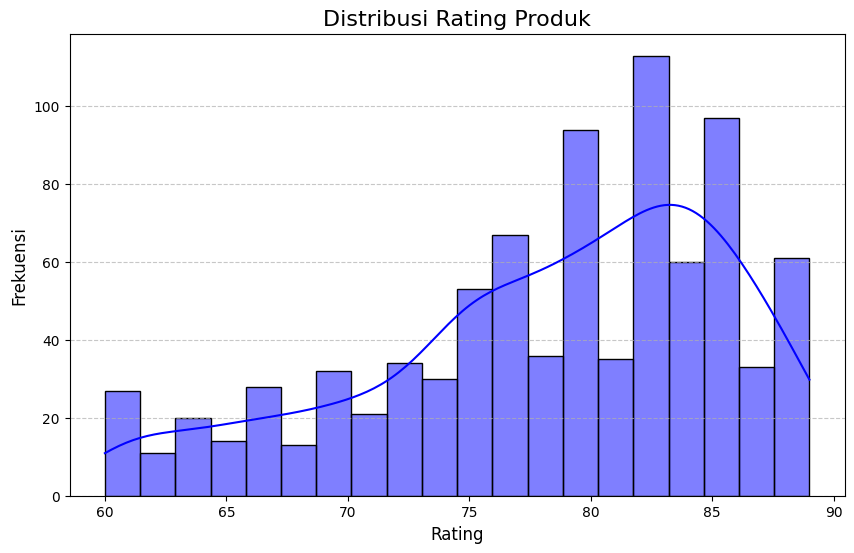

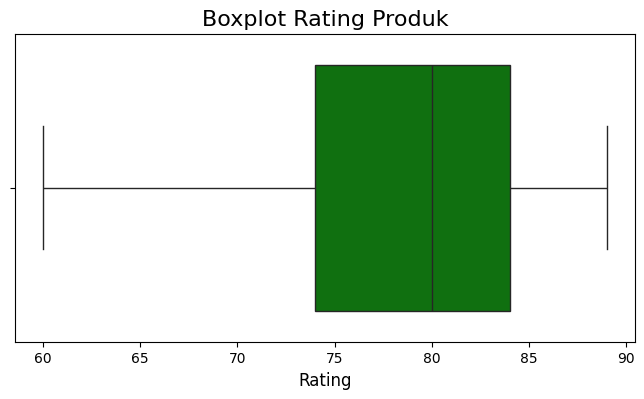

In [18]:
# Mengatur ukuran plot
plt.figure(figsize=(10, 6))

# Membuat histogram untuk kolom 'rating'
sns.histplot(data=dataset, x='rating', bins=20, kde=True, color='blue')
plt.title('Distribusi Rating Produk', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Membuat boxplot untuk kolom 'rating'
plt.figure(figsize=(8, 4))
sns.boxplot(data=dataset, x='rating', color='green')
plt.title('Boxplot Rating Produk', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.show()

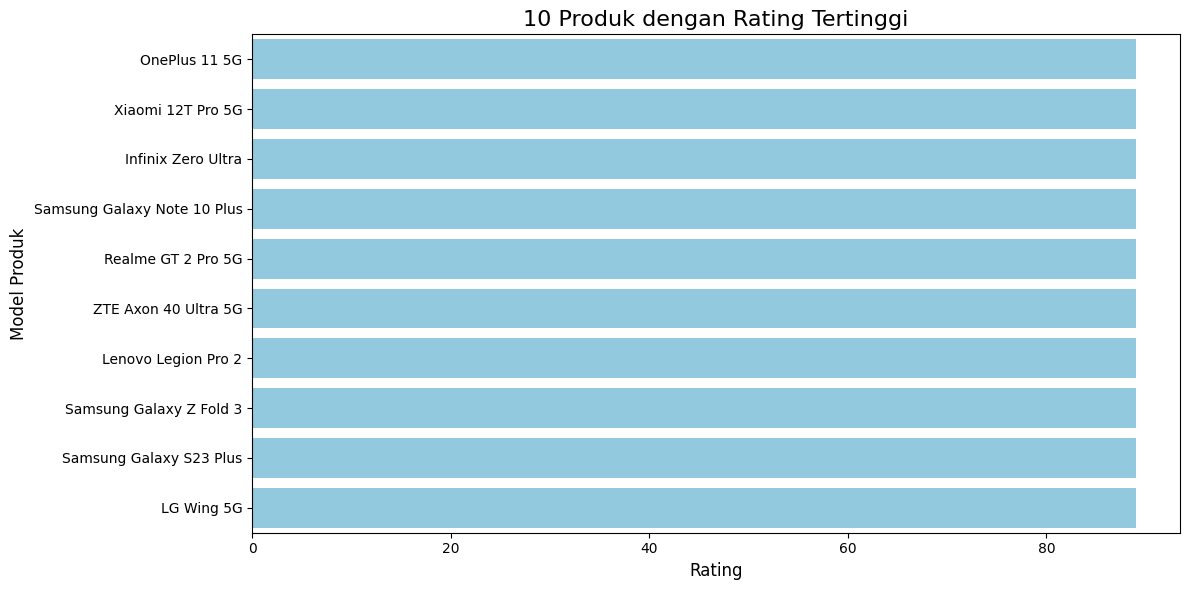

In [19]:
# Urutkan dataset berdasarkan rating secara menurun
top_rated = dataset.sort_values(by='rating', ascending=False).head(10)

# Buat plot bar untuk produk dengan rating tertinggi
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_rated,
    x='rating',
    y='model',
    color='skyblue'  # Menggunakan warna solid
)

# Tambahkan judul dan label
plt.title('10 Produk dengan Rating Tertinggi', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Model Produk', fontsize=12)

# Tampilkan visualisasi
plt.tight_layout()
plt.show()

##### Distribusi Produk Berdasarkan Brand

<ipython-input-20-718c82936f6c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, y='brand', palette='Set3', order=dataset['brand'].value_counts().index)


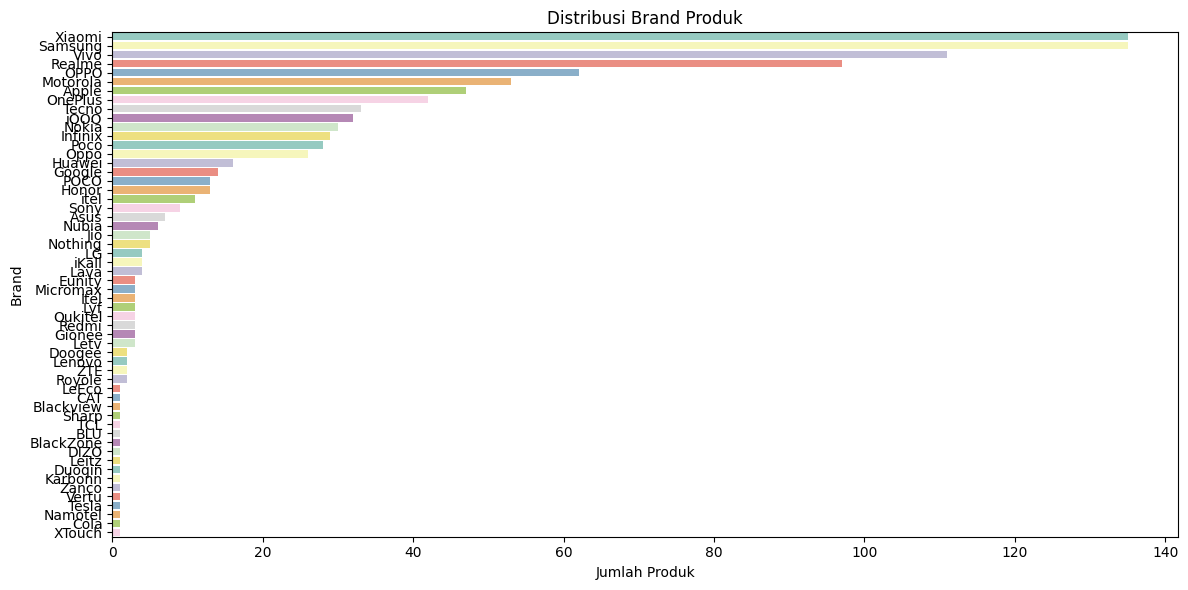

In [20]:
# Hitung distribusi produk berdasarkan brand
plt.figure(figsize=(12, 6))

# Membuat countplot dengan orientasi horizontal agar nama brand lebih terlihat
sns.countplot(data=dataset, y='brand', palette='Set3', order=dataset['brand'].value_counts().index)

# Menambahkan judul dan label
plt.title('Distribusi Brand Produk')
plt.xlabel('Jumlah Produk')
plt.ylabel('Brand')

# Menampilkan grafik
plt.tight_layout()
plt.show()

##### Disribusi Harga Produk

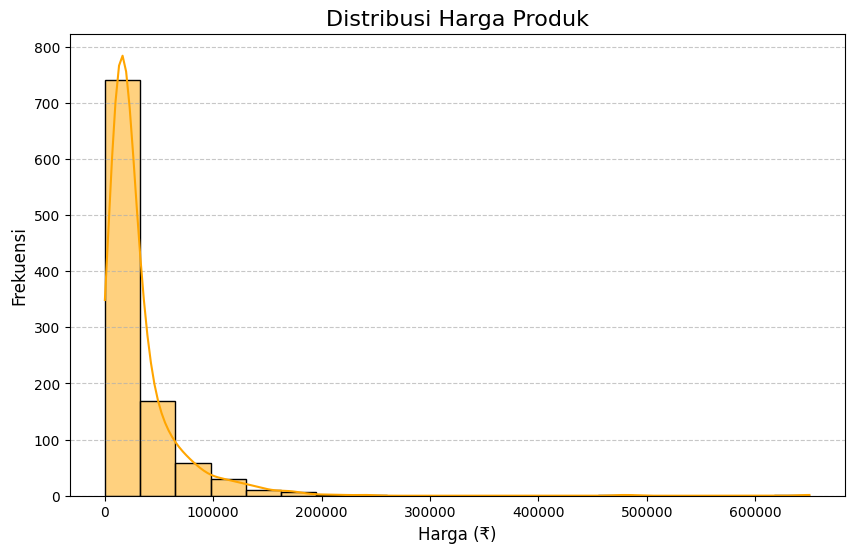

In [21]:
# Mengatur ukuran plot
plt.figure(figsize=(10, 6))

# Membuat histogram untuk kolom 'price_numeric'
sns.histplot(data=dataset, x='price', bins=20, kde=True, color='orange')
plt.title('Distribusi Harga Produk', fontsize=16)
plt.xlabel('Harga (₹)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

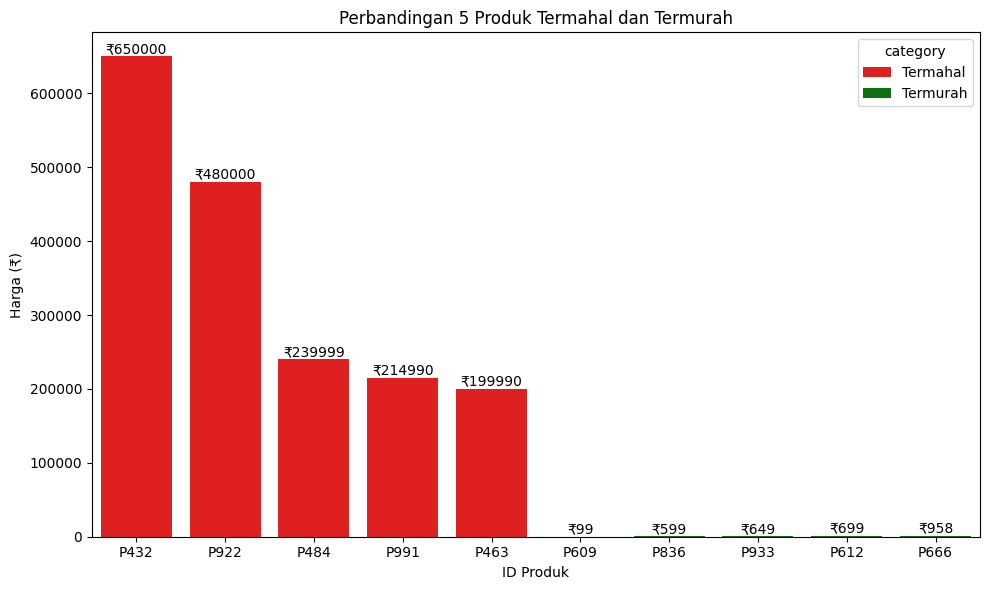

In [22]:
# Mengambil 5 produk dengan harga termahal dan termurah
top_5_expensive = dataset.nlargest(5, 'price')
top_5_cheap = dataset.nsmallest(5, 'price')

# Menambahkan kolom 'category' untuk membedakan produk termahal dan termurah
top_5_expensive['category'] = 'Termahal'
top_5_cheap['category'] = 'Termurah'

# Menggabungkan kedua dataframe
top_5_products = pd.concat([top_5_expensive, top_5_cheap])

# Membuat bar plot dengan warna berbeda berdasarkan kategori
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_products, x='product_id', y='price', hue='category', palette={'Termahal': 'red', 'Termurah': 'green'})

# Menambahkan judul dan label
plt.title('Perbandingan 5 Produk Termahal dan Termurah')
plt.ylabel('Harga (₹)')
plt.xlabel('ID Produk')

# Menambahkan harga di atas setiap batang
for i in range(len(top_5_products)):
    plt.text(i, top_5_products['price'].iloc[i] + 500,
             f"₹{top_5_products['price'].iloc[i]}", ha='center', va='bottom', fontsize=10)

# Menampilkan grafik
plt.tight_layout()
plt.show()

## Data Preparation

In [23]:
# Penambahan kolom baru yang dibutuhkan untuk tahap Modeling
# Membersihkan karakter non-breaking space dan mengganti satuan TB dengan GB
dataset["ram"] = dataset["ram"].str.replace(r"\u2009", " ", regex=True)

# Mengganti TB dengan GB (jika ada TB di storage, konversi ke GB)
dataset["ram"] = dataset["ram"].str.replace(r"(\d+)\s?TB", lambda x: str(int(x.group(1)) * 1024) + " GB inbuilt", regex=True)

# Ekstraksi RAM dan Storage
dataset[["ram_size", "storage_size"]] = dataset["ram"].str.extract(r"(\d+)\s?GB RAM.*?(\d+)\s?GB inbuilt")

# Mengonversi kolom ram_size dan storage_size ke float
dataset["ram_size"] = dataset["ram_size"].astype(float)
dataset["storage_size"] = dataset["storage_size"].astype(float)

# Membuat kolom battery_capacity dengan regex
dataset['battery_capacity'] = dataset['battery'].str.extract(r'(\d+)\s?mAh').astype(float)

In [24]:
pd.DataFrame({'Missing Value':dataset.isnull().sum()})

,Missing Value
model,0
price,0
rating,141
sim,0
processor,0
ram,0
battery,0
display,0
camera,1
card,7


In [25]:
# Menampilkan jumlah data duplikat
duplicated_data = pd.DataFrame({'Duplicated Data': [dataset.duplicated().sum()]})

# Menampilkan DataFrame
print(duplicated_data)

   Duplicated Data
0                0


In [26]:
# Membersihkan missing value dengan fungsi dropna()
dataset_clean = dataset.dropna()
dataset_clean

,model,price,rating,sim,processor,ram,battery,display,camera,card,os,product_id,brand,ram_size,storage_size,battery_capacity
0,OnePlus 11 5G,54999,89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",5000 mAh Battery with 100W Fast Charging,"6.7 inches, 1440 x 3216 px, 120 Hz Display wit...",50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...,Memory Card Not Supported,Android v13,P1,OnePlus,12.0,256.0,5000.0
1,OnePlus Nord CE 2 Lite 5G,19989,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 33W Fast Charging,"6.59 inches, 1080 x 2412 px, 120 Hz Display wi...",64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,P2,OnePlus,6.0,128.0,5000.0
2,Samsung Galaxy A14 5G,16499,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4 GHz Processor","4 GB RAM, 64 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px, 90 Hz Display with...",50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13,P3,Samsung,4.0,64.0,5000.0
3,Motorola Moto G62 5G,14999,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.55 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v12,P4,Motorola,6.0,128.0,5000.0
4,Realme 10 Pro Plus,24999,82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Memory Card Not Supported,Android v13,P5,Realme,6.0,128.0,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,Motorola Moto Edge S30 Pro,34990,83.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 8 Gen1, Octa Core, 3 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 68.2W Fast Charging,"6.67 inches, 1080 x 2460 px, 120 Hz Display wi...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Android v12,No FM Radio,P1016,Motorola,8.0,128.0,5000.0
1016,Honor X8 5G,14990,75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 480+, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 22.5W Fast Charging,"6.5 inches, 720 x 1600 px Display with Water D...",48 MP + 2 MP + Depth Sensor Triple Rear & 8 MP...,"Memory Card Supported, upto 1 TB",Android v11,P1017,Honor,6.0,128.0,5000.0
1017,POCO X4 GT 5G (8GB RAM + 256GB),28990,85.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8100, Octa Core, 2.85 GHz Processor","8 GB RAM, 256 GB inbuilt",5080 mAh Battery with 67W Fast Charging,"6.6 inches, 1080 x 2460 px, 144 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,Memory Card Not Supported,Android v12,P1018,POCO,8.0,256.0,5080.0
1018,Motorola Moto G91 5G,19990,80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 695, Octa Core, 2.2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with Fast Charging,"6.8 inches, 1080 x 2400 px Display with Punch ...",108 MP + 8 MP + 2 MP Triple Rear & 32 MP Front...,"Memory Card Supported, upto 1 TB",Android v12,P1019,Motorola,6.0,128.0,5000.0


In [27]:
# Mengecek kembali missing value pada variabel dataset
dataset_clean.isnull().sum()

,0
model,0
price,0
rating,0
sim,0
processor,0
ram,0
battery,0
display,0
camera,0
card,0


In [28]:
# Menampilkan kembali jumlah baris dan kolom
print("Jumlah baris dan kolom:", dataset_clean.shape)

# Menampilkan jumlah baris saja
print("Jumlah baris:", dataset_clean.shape[0])

# Atau menggunakan metode count() untuk jumlah data di setiap kolom
print("Jumlah data di setiap kolom:")
print(dataset_clean.count())

Jumlah baris dan kolom: (868, 16)
Jumlah baris: 868
Jumlah data di setiap kolom:
model               868
price               868
rating              868
sim                 868
processor           868
ram                 868
battery             868
display             868
camera              868
card                868
os                  868
product_id          868
brand               868
ram_size            868
storage_size        868
battery_capacity    868
dtype: int64


In [29]:
dataset_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
price,868.0,28937.801843,36333.798506,3499.0,13496.75,19988.5,30990.0,650000.0
rating,868.0,78.299539,7.416130,60.0,74.00,80.0,84.0,89.0
ram_size,868.0,6.496544,2.468484,2.0,4.00,6.0,8.0,18.0
storage_size,868.0,135.520737,93.778560,32.0,64.00,128.0,128.0,1024.0
battery_capacity,868.0,4865.904378,1016.888592,1821.0,4500.00,5000.0,5000.0,22000.0


In [30]:
dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 868 entries, 0 to 1019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   model             868 non-null    object 
 1   price             868 non-null    int64  
 2   rating            868 non-null    float64
 3   sim               868 non-null    object 
 4   processor         868 non-null    object 
 5   ram               868 non-null    object 
 6   battery           868 non-null    object 
 7   display           868 non-null    object 
 8   camera            868 non-null    object 
 9   card              868 non-null    object 
 10  os                868 non-null    object 
 11  product_id        868 non-null    object 
 12  brand             868 non-null    object 
 13  ram_size          868 non-null    float64
 14  storage_size      868 non-null    float64
 15  battery_capacity  868 non-null    float64
dtypes: float64(4), int64(1), object(11)
memory usage

## Model Development

In [31]:
dataset_clean = dataset_clean.drop(columns=["sim", "processor", "ram", "battery", "display", "camera", "card"])

# Menampilkan data setelah penghapusan kolom
print(dataset_clean.head())

                       model  price  rating           os product_id     brand  \
0              OnePlus 11 5G  54999    89.0  Android v13         P1   OnePlus   
1  OnePlus Nord CE 2 Lite 5G  19989    81.0  Android v12         P2   OnePlus   
2      Samsung Galaxy A14 5G  16499    75.0  Android v13         P3   Samsung   
3       Motorola Moto G62 5G  14999    81.0  Android v12         P4  Motorola   
4         Realme 10 Pro Plus  24999    82.0  Android v13         P5    Realme   

   ram_size  storage_size  battery_capacity  
0      12.0         256.0            5000.0  
1       6.0         128.0            5000.0  
2       4.0          64.0            5000.0  
3       6.0         128.0            5000.0  
4       6.0         128.0            5000.0  


### Model Content Based Filtering

#### Model Content Based Filtering dengan Data Text

In [32]:
text_df = pd.DataFrame(dataset_clean)

In [33]:
# Menggunakan TfidfVectorizer untuk 'os' dan 'brand'
tfidf = TfidfVectorizer(analyzer="word", ngram_range=(1, 2), stop_words="english")

In [34]:
# Menggabungkan 'os' dan 'brand' untuk analisis teks
combined_features = text_df['os'] + ' ' + text_df['brand']

In [35]:
# Transformasi data menggunakan TfidfVectorizer
tfidf_matrix = tfidf.fit_transform(combined_features)

In [36]:
# Menghitung cosine similarity antar produk
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

##### Rekomendasi berdasarkan Cosine Similarity

In [37]:
# Fungsi rekomendasi berdasarkan cosine similarity untuk fitur 'os' dan 'brand'
def recommend_products_os_brand(product_id, num_recommendations=20):
    # Menampilkan detail produk yang diminta
    input_product = text_df[text_df['product_id'] == product_id]
    print("\nProduk yang diminta:")
    print(input_product[['product_id', 'model', 'os', 'brand']])

    # Mendapatkan indeks dari produk yang diminta
    idx = text_df[text_df['product_id'] == product_id].index[0]

    # Ambil skor cosine similarity dengan produk lainnya
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Urutkan produk berdasarkan similarity
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Ambil rekomendasi berdasarkan urutan similarity (exclude produk itu sendiri)
    sim_scores = sim_scores[1:num_recommendations+1]

    # Ambil produk yang direkomendasikan
    recommended_product_ids = [text_df.iloc[i[0]] for i in sim_scores]

    # Menggabungkan detail produk rekomendasi
    recommended_products = pd.DataFrame(recommended_product_ids)
    recommended_products['similarity_score'] = [i[1] for i in sim_scores]

    # Menampilkan hasil rekomendasi
    print("\n20 Rekomendasi Produk Teratas berdasarkan OS dan Brand:")
    print(recommended_products[['product_id', 'os', 'brand', 'similarity_score']])

    return recommended_products

In [38]:
# Rekomendasi produk berdasarkan produk dengan ID 'P3'
recommended_products = recommend_products_os_brand('P4')


Produk yang diminta:
  product_id                 model           os     brand
3         P4  Motorola Moto G62 5G  Android v12  Motorola

20 Rekomendasi Produk Teratas berdasarkan OS dan Brand:
     product_id           os     brand  similarity_score
53          P54  Android v12  Motorola          1.000000
59          P60  Android v12  Motorola          1.000000
80          P81  Android v12  Motorola          1.000000
92          P93  Android v12  Motorola          1.000000
126        P127  Android v12  Motorola          1.000000
151        P152  Android v12  Motorola          1.000000
187        P188  Android v12  Motorola          1.000000
194        P195  Android v12  Motorola          1.000000
204        P205  Android v12  Motorola          1.000000
350        P351  Android v12  Motorola          1.000000
421        P422  Android v12  Motorola          1.000000
437        P438  Android v12  Motorola          1.000000
494        P495  Android v12  Motorola          1.000000
558    

##### Rekomendasi dengan Eclidean Distace

In [39]:
# Fungsi rekomendasi berdasarkan Euclidean Distance untuk fitur 'os' dan 'brand'
def recommend_products_os_brand_euclidean(product_id, num_recommendations=20):
    # Menampilkan detail produk yang diminta
    input_product = text_df[text_df['product_id'] == product_id]
    print("\nProduk yang diminta:")
    print(input_product[['product_id', 'model', 'os', 'brand']])

    # Mendapatkan indeks dari produk yang diminta
    idx = text_df[text_df['product_id'] == product_id].index[0]

    # Menghitung jarak Euclidean antar produk berdasarkan fitur 'os' dan 'brand'
    euclidean_dist = euclidean_distances(tfidf_matrix[idx], tfidf_matrix)  # tfidf_matrix berisi representasi teks

    # Urutkan produk berdasarkan jarak Euclidean terdekat (kecil lebih mirip)
    sim_scores = list(enumerate(euclidean_dist[0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1])  # Urutkan berdasarkan jarak (semakin kecil semakin mirip)

    # Ambil rekomendasi berdasarkan urutan jarak terdekat (exclude produk itu sendiri)
    sim_scores = sim_scores[1:num_recommendations+1]  # Hapus produk yang diminta (index 0)

    # Ambil produk yang direkomendasikan
    recommended_product_ids = [text_df.iloc[i[0]] for i in sim_scores]

    # Menggabungkan detail produk rekomendasi
    recommended_products = pd.DataFrame(recommended_product_ids)
    recommended_products['euclidean_distance'] = [i[1] for i in sim_scores]

    # Menyaring produk yang sama dengan produk yang diminta (bila ada)
    recommended_products = recommended_products[recommended_products['product_id'] != product_id]

    # Menampilkan hasil rekomendasi
    print("\n20 Rekomendasi Produk Teratas berdasarkan Euclidean Distance (tanpa produk yang diminta):")
    print(recommended_products[['product_id', 'os', 'brand', 'euclidean_distance']])

    return recommended_products

In [40]:
# Rekomendasi produk berdasarkan produk dengan ID 'P3'
recommended_products = recommend_products_os_brand_euclidean('P7')


Produk yang diminta:
  product_id            model       os  brand
6         P7  Apple iPhone 14  iOS v16  Apple

20 Rekomendasi Produk Teratas berdasarkan Euclidean Distance (tanpa produk yang diminta):
    product_id         os  brand  euclidean_distance
27         P28    iOS v16  Apple            0.000000
56         P57    iOS v16  Apple            0.000000
100       P101    iOS v16  Apple            0.000000
210       P211    iOS v16  Apple            0.000000
247       P248    iOS v16  Apple            0.000000
290       P291    iOS v16  Apple            0.000000
323       P324    iOS v16  Apple            0.000000
420       P421    iOS v16  Apple            0.000000
636       P637    iOS v16  Apple            0.000000
764       P765    iOS v16  Apple            0.000000
813       P814    iOS v16  Apple            0.000000
814       P815    iOS v16  Apple            0.000000
928       P929    iOS v16  Apple            0.000000
15         P16    iOS v15  Apple            1.170818


#### Model Based Filtering dengan Data Numeric

In [41]:
numeric_df = pd.DataFrame(dataset_clean)

In [42]:
# Pilih fitur numerik
features = ['ram_size', 'storage_size', 'battery_capacity']

In [43]:
# Normalisasi data menggunakan StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_df[features])

In [44]:
# Hitung cosine similarity antar produk
numeric_cosine_sim = cosine_similarity(scaled_features, scaled_features)
numeric_cosine_sim[:4, :4]

array([[ 1.        , -0.81760888, -0.98047525, -0.81760888],
       [-0.81760888,  1.        ,  0.87332326,  1.        ],
       [-0.98047525,  0.87332326,  1.        ,  0.87332326],
       [-0.81760888,  1.        ,  0.87332326,  1.        ]])

##### Rekomendasi berdasarkan Cosine Similarity

In [47]:
def recommend_products(product_id, num_recommendations=20):
    # Menampilkan detail produk yang diminta
    input_product = numeric_df[numeric_df['product_id'] == product_id]
    print("Produk yang diminta:")
    print(input_product[['product_id', 'model', 'ram_size', 'storage_size', 'battery_capacity']])

    # Mendapatkan indeks dari produk yang diminta
    idx = numeric_df[numeric_df['product_id'] == product_id].index[0]

    # Ambil skor cosine similarity dengan produk lainnya
    sim_scores = list(enumerate(numeric_cosine_sim[idx]))

    # Urutkan produk berdasarkan similarity
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Ambil rekomendasi berdasarkan urutan similarity (exclude produk itu sendiri)
    sim_scores = sim_scores[1:num_recommendations+1]

    # Ambil produk yang direkomendasikan
    recommended_product_ids = [numeric_df.iloc[i[0]] for i in sim_scores]

    # Menggabungkan detail produk rekomendasi
    recommended_products = pd.DataFrame(recommended_product_ids)
    recommended_products['similarity_score'] = [i[1] for i in sim_scores]

     # Menyaring produk yang sama dengan produk yang diminta (bila ada)
    recommended_products = recommended_products[recommended_products['product_id'] != product_id]

    # Menampilkan hasil rekomendasi
    print("\n20 Rekomendasi Produk Teratas:")
    print(recommended_products[['product_id', 'ram_size', 'storage_size', 'battery_capacity','similarity_score']])

    return recommended_products

In [48]:
# Rekomendasi produk berdasarkan produk dengan ID 'P1'
recommended_products = recommend_products('P4')

Produk yang diminta:
  product_id                 model  ram_size  storage_size  battery_capacity
3         P4  Motorola Moto G62 5G       6.0         128.0            5000.0

20 Rekomendasi Produk Teratas:
   product_id  ram_size  storage_size  battery_capacity  similarity_score
4          P5       6.0         128.0            5000.0               1.0
5          P6       6.0         128.0            5000.0               1.0
10        P11       6.0         128.0            5000.0               1.0
12        P13       6.0         128.0            5000.0               1.0
13        P14       6.0         128.0            5000.0               1.0
31        P32       6.0         128.0            5000.0               1.0
34        P35       6.0         128.0            5000.0               1.0
40        P41       6.0         128.0            5000.0               1.0
41        P42       6.0         128.0            5000.0               1.0
42        P43       6.0         128.0            5000

In [51]:
def recommend_products_euclidean(product_id, num_recommendations=20):
    # Menampilkan detail produk yang diminta
    input_product = numeric_df[numeric_df['product_id'] == product_id]
    print("Produk yang diminta:")
    print(input_product[['product_id', 'ram_size', 'storage_size', 'battery_capacity']])

    # Mendapatkan indeks dari produk yang diminta
    idx = numeric_df[numeric_df['product_id'] == product_id].index[0]

    # Hitung jarak Euclidean antara produk yang diminta dengan produk lainnya
    distances = euclidean_distances([numeric_df.iloc[idx][['ram_size', 'storage_size', 'battery_capacity']]],
                                    numeric_df[['ram_size', 'storage_size', 'battery_capacity']])

    # Dapatkan jarak untuk produk lainnya (exclude produk itu sendiri)
    distances = distances.flatten()
    sorted_indices = distances.argsort()[1:num_recommendations + 1]  # Exclude produk itu sendiri

    # Ambil produk yang direkomendasikan
    recommended_product_ids = numeric_df.iloc[sorted_indices]

    # Gabungkan dengan skor jarak (semakin kecil jarak, semakin mirip)
    recommended_product_ids['distance'] = distances[sorted_indices]

    # Menyaring produk yang sama dengan produk yang diminta (bila ada)
    recommended_product_ids = recommended_product_ids[recommended_product_ids['product_id'] != product_id]

    # Menampilkan hasil rekomendasi
    print("\n20 Rekomendasi Produk Teratas berdasarkan Euclidean Distance:")
    print(recommended_product_ids[['product_id', 'ram_size', 'storage_size', 'battery_capacity', 'distance']])

    return recommended_product_ids

In [52]:
# Rekomendasi produk berdasarkan produk dengan ID 'P1'
recommended_products = recommend_products_euclidean('P14')

Produk yang diminta:
   product_id  ram_size  storage_size  battery_capacity
13        P14       6.0         128.0            5000.0

20 Rekomendasi Produk Teratas berdasarkan Euclidean Distance:
    product_id  ram_size  storage_size  battery_capacity  distance
833       P834       6.0         128.0            5000.0       0.0
289       P290       6.0         128.0            5000.0       0.0
150       P151       6.0         128.0            5000.0       0.0
654       P655       6.0         128.0            5000.0       0.0
138       P139       6.0         128.0            5000.0       0.0
137       P138       6.0         128.0            5000.0       0.0
134       P135       6.0         128.0            5000.0       0.0
314       P315       6.0         128.0            5000.0       0.0
633       P634       6.0         128.0            5000.0       0.0
128       P129       6.0         128.0            5000.0       0.0
623       P624       6.0         128.0            5000.0       0.0


<ipython-input-51-1b9a39ebd01e>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_product_ids['distance'] = distances[sorted_indices]


### Collaborative Filtering

#### Collaborative Filtering dengan Model KKN

In [53]:
df = pd.DataFrame(dataset_clean)

In [54]:
# Pilih fitur yang relevan
features = ['price', 'rating']

In [55]:
# Normalisasi data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

In [56]:
# Melihat hasil normalisasi dalam bentuk DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features)
# Menampilkan beberapa baris pertama untuk memverifikasi hasil normalisasi
print(scaled_df.head())

      price    rating
0  0.717685  1.443695
1 -0.246436  0.364343
2 -0.342545 -0.445170
3 -0.383853  0.364343
4 -0.108469  0.499262


In [57]:
# Inisialisasi model KNN
knn_model = NearestNeighbors(metric='euclidean', algorithm='brute')
knn_model.fit(scaled_features)

NearestNeighbors(algorithm='brute', metric='euclidean')

In [58]:
def recommend_products(product_id, num_recommendations=5):
    # Cari indeks produk berdasarkan ID
    idx = df[df['product_id'] == product_id].index[0]

    # Cari produk paling mirip
    distances, indices = knn_model.kneighbors([scaled_features[idx]], n_neighbors=num_recommendations + 1)

    # Hapus produk itu sendiri dari rekomendasi
    recommendations = []
    for i, dist in zip(indices[0], distances[0]):
        if i != idx:  # Pastikan tidak memasukkan produk input
            recommendations.append({'product_id': df.iloc[i]['product_id'], 'distance': dist})

    # Konversi hasil rekomendasi ke DataFrame
    recommendations_df = pd.DataFrame(recommendations)

    # Gabungkan detail produk dari dataset
    recommended_details = df.loc[df['product_id'].isin(recommendations_df['product_id'])]
    recommended_details = recommended_details.merge(recommendations_df, on='product_id')

    # Urutkan berdasarkan jarak (distance)
    recommended_details = recommended_details.sort_values(by='distance').reset_index(drop=True)

    # Menampilkan hanya informasi yang diminta
    result = recommended_details[['product_id', 'model', 'price', 'rating', 'distance']]

    # Menampilkan informasi produk yang dimasukkan
    input_product = df.loc[df['product_id'] == product_id]
    input_product_details = input_product[['product_id', 'model', 'price', 'rating']]
    print("Informasi Produk yang Dimasukkan:")
    print(input_product_details)

    return result

In [59]:
recommendations = recommend_products('P14', num_recommendations=5)
print("Rekomendasi untuk produk P14:")
print(recommendations)

Informasi Produk yang Dimasukkan:
   product_id                         model  price  rating
13        P14  Vivo T1 5G (6GB RAM + 128GB)  16990    80.0
Rekomendasi untuk produk P14:
  product_id                                    model  price  rating  distance
0       P543               OPPO K10 (8GB RAM + 128GB)  16990    80.0  0.000000
1         P6  Samsung Galaxy F23 5G (6GB RAM + 128GB)  16999    80.0  0.000248
2       P315                     Motorola Moto G71 5G  16999    80.0  0.000248
3       P320                              Honor X9 5G  16999    80.0  0.000248
4       P696                      Infinix Note 13 Pro  16999    80.0  0.000248


#### Collaborating Filtering dengan Deep Learning Auto Decoder

In [60]:
# Definisikan Autoencoder
input_layer = Input(shape=(scaled_features.shape[1],))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)

decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
output_layer = Dense(scaled_features.shape[1], activation='linear')(decoded)

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer=Adam(), loss='mse')

In [61]:
# Latih Autoencoder
autoencoder.fit(scaled_features, scaled_features, epochs=50, batch_size=32, shuffle=True)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7486
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3065 
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2462 
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0657 
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0075 
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0126 
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0041
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026 
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015     
Epoch 10/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 
Epoch 11/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0630e-04
Epoch 12/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5134e-04
Epoch 13/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8296e-04
Epoch 14/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6404e-04 
Epoch 15/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - los

In [62]:
# Mendapatkan fitur terkompresi (encoded)
encoder = Model(input_layer, encoded)
encoded_features = encoder.predict(scaled_features)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [63]:
def recommend_products_deep_learning(product_id, num_recommendations=5):
    # Cari indeks produk berdasarkan ID
    idx = df[df['product_id'] == product_id].index[0]

    # Ambil informasi produk yang dimasukkan
    input_product = df.loc[df['product_id'] == product_id]

    # Hitung jarak cosine antar produk berdasarkan fitur terkompresi
    cosine_similarities = np.dot(encoded_features, encoded_features[idx]) / (np.linalg.norm(encoded_features, axis=1) * np.linalg.norm(encoded_features[idx]))

    # Urutkan berdasarkan kemiripan tertinggi
    similar_indices = cosine_similarities.argsort()[-(num_recommendations + 1):-1][::-1]

    recommendations = []
    for i in similar_indices:
        recommendations.append({'product_id': df.iloc[i]['product_id'], 'similarity': cosine_similarities[i]})

    # Konversi hasil rekomendasi ke DataFrame
    recommendations_df = pd.DataFrame(recommendations)

    # Gabungkan detail produk dari dataset
    recommended_details = df.loc[df['product_id'].isin(recommendations_df['product_id'])]
    recommended_details = recommended_details.merge(recommendations_df, on='product_id')

    # Urutkan berdasarkan kemiripan tertinggi (similarity)
    recommended_details = recommended_details.sort_values(by='similarity', ascending=False).reset_index(drop=True)

    # Menampilkan informasi produk yang dimasukkan
    input_product_details = input_product[['product_id', 'model', 'price', 'rating']]
    print("Informasi Produk yang Dimasukkan:")
    print(input_product_details)

    # Menampilkan rekomendasi produk dengan detail yang diminta
    print("\nRekomendasi Produk Teratas:")
    print(recommended_details[['product_id', 'model', 'price', 'rating', 'similarity']])

    return recommended_details

In [64]:
# Contoh penggunaan untuk produk P8
recommendations = recommend_products_deep_learning('P8', num_recommendations=5)

Informasi Produk yang Dimasukkan:
  product_id                          model  price  rating
7         P8  Xiaomi Redmi Note 12 Pro Plus  29999    86.0

Rekomendasi Produk Teratas:
  product_id                          model  price  rating  similarity
0         P8  Xiaomi Redmi Note 12 Pro Plus  29999    86.0    1.000000
1       P360     Poco F4 (12GB RAM + 256GB)  29999    86.0    1.000000
2       P747           Xiaomi Mi 10T Pro 5G  29999    86.0    1.000000
3       P154                       Oppo A98  30990    87.0    0.999910
4        P37                   Oppo Reno 8T  29990    87.0    0.999889


### Evaluation

In [65]:
# Fungsi untuk cross-validation manual
def manual_cross_val(knn_model, scaled_features, n_splits=3):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    errors = []

    for train_index, test_index in kf.split(scaled_features):
        X_train, X_test = scaled_features[train_index], scaled_features[test_index]
        # Model tidak membutuhkan target y karena hanya mencari tetangga
        # Kita menggunakan jarak yang dihitung dari NearestNeighbors sebagai 'prediksi'

        # Latih model dengan data pelatihan
        knn_model.fit(X_train)

        # Prediksi untuk data uji (hanya mengambil jarak dari tetangga terdekat)
        distances, indices = knn_model.kneighbors(X_test)

        # Hitung error dengan MSE berdasarkan jarak (ini bisa dimodifikasi dengan metrik lain)
        # MSE dihitung berdasarkan jarak antara produk uji dan produk tetangga terdekat
        error = mean_squared_error(X_test, X_train[indices].mean(axis=1))  # Menggunakan rata-rata tetangga terdekat
        errors.append(error)

    return np.mean(errors)

In [66]:
# Menggunakan manual cross-validation
average_error = manual_cross_val(knn_model, scaled_features, n_splits=3)

print(f"Average error from manual cross-validation: {average_error}")

Average error from manual cross-validation: 0.14964355364582532


In [67]:
# Rekonstruksi data menggunakan autoencoder
reconstructed_features = autoencoder.predict(scaled_features)

# Hitung MSE
mse = np.mean(np.square(scaled_features - reconstructed_features), axis=1)

# Hitung rata-rata MSE
average_mse = np.mean(mse)
print(f"Rata-rata MSE: {average_mse:.4f}")

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Rata-rata MSE: 0.0025
